In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import re
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('segundo-semestre-2022.csv', sep = ',')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20,21,22,25,41,42,43,46,52,56,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,2022-08-10 11:25:43.003,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,...,NaN,UMBANDA E CANDOMBLÉ,NaN,PARDO,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,2022-07-20 12:58:24.817,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS
2,35FEA1E1B00682B804F734A31C51555BA62F2722B43588...,2022-10-30 20:53:36.507,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,PR,410690 | CURITIBA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA
3,8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...,2022-10-31 00:57:36.793,WHATSAPP,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,350950 | CAMPINAS,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
4,2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...,2022-10-14 13:39:51.817,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DO SUSPEITO,BR | BRASIL,BA,291840 | JUAZEIRO,NÃO SABE INFORMAR,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO


In [136]:
sample = df[['Sexo_do_suspeito','Sexo_da_vítima']]

In [139]:
ctab = pd.crosstab(sample['Sexo_do_suspeito'],sample['Sexo_da_vítima'])

In [140]:
stats.chi2_contingency(ctab)

(37413.16363808194,
 0.0,
 25,
 array([[2.78972249e+05, 2.35197250e+02, 1.20479356e+05, 1.74220185e+00,
         6.19178537e+03, 7.23667093e+03],
        [2.25545623e+02, 1.90154076e-01, 9.74060732e+01, 1.40854871e-03,
         5.00598211e+00, 5.85075920e+00],
        [3.37643148e+00, 2.84661790e-03, 1.45817475e+00, 2.10860585e-05,
         7.49398520e-02, 8.75862156e-02],
        [3.29488391e+05, 2.77786639e+02, 1.42295691e+05, 2.05767880e+00,
         7.31299047e+03, 8.54708333e+03],
        [3.05276676e+04, 2.57374111e+01, 1.31839412e+04, 1.90647490e-01,
         6.77561178e+02, 7.91902010e+02],
        [1.28777097e+03, 1.08570007e+00, 5.56147849e+02, 8.04222272e-03,
         2.85820596e+01, 3.34053826e+01]]))

In [31]:
def verify(dataFrame, coluna):
    print('Dados Faltantes: ',sum(dataFrame[str(coluna)].isna()))
    print('\n',dataFrame[str(coluna)].value_counts())
    print('\nDescrição dos dados:\n',dataFrame[str(coluna)].describe())

In [137]:
sample.head()

,Sexo_do_suspeito,Sexo_da_vítima
0,NaN,MASCULINO
1,NÃO INFORMADO,FEMININO
2,FEMININO,MASCULINO
3,MASCULINO,FEMININO
4,MASCULINO,FEMININO


In [95]:
t = sample[((sample['Sexo_do_suspeito'] == 'MASCULINO') | (sample['Sexo_do_suspeito'] == 'FEMININO')) &
          ((sample['Sexo_da_vítima'] == 'MASCULINO') | (sample['Sexo_da_vítima'] == 'FEMININO'))]

In [96]:
t['Sexo_da_vítima'].value_counts()

FEMININO     611557
MASCULINO    263086
Name: Sexo_da_vítima, dtype: int64

In [97]:
t = t.dropna()

In [99]:
verify(t, 'Sexo_da_vítima')

Dados Faltantes:  0

 FEMININO     611557
MASCULINO    263086
Name: Sexo_da_vítima, dtype: int64

Descrição dos dados:
 count       874643
unique           2
top       FEMININO
freq        611557
Name: Sexo_da_vítima, dtype: object


In [109]:
ctab = pd.crosstab(t['Sexo_do_suspeito'],t['Sexo_da_vítima'])

In [91]:
df.dtypes

hash                            object
Data_de_cadastro                object
Canal_de_atendimento            object
Denúncia_emergencial            object
Denunciante                     object
                                 ...  
Vínculo_Órgão_PJ_do_suspeito    object
sl_suspeito_ramo                object
suspeito_especificacao_etnia    object
vitima_especificacao_etnia      object
violacao                        object
Length: 62, dtype: object

In [123]:
df.columns

Index(['hash', 'Data_de_cadastro', 'Canal_de_atendimento',
       'Denúncia_emergencial', 'Denunciante', 'Cenário_da_violação', 'País',
       'UF', 'Município', 'Frequência', 'Início_das_violações',
       'sl_quantidade_vitimas', 'Grupo_vulnerável', 'Motivação',
       'Relação_vítima_suspeito', 'sl_vitima_cadastro', 'Sexo_da_vítima',
       'Orientação_sexual_da_vítima', 'Faixa_etária_da_vítima',
       'Nacionalidade_da_vítima', 'sl_vitima_naturalidade',
       'sl_vitima_naturalizado_uf', 'sl_vitima_naturalizado_municipio',
       'Deficiência_da_vítima', 'Doença_rara_da_vítima',
       'Deficiência_relacionada_a_doença_rara', 'Vítima_preso_a',
       'País_da_vítima', 'UF_da_vítima', 'Município_da_vítima',
       'Profissão_da_vítima', 'Grau_de_instrução_da_vítima',
       'Religião_da_vítima', 'Raça_Cor_da_vítima', 'Etnia_da_vítima',
       'Faixa_de_renda_da_vítima', 'Natureza_Jurídica_do_Suspeito',
       'Sexo_do_suspeito', 'Orientação_sexual_do_suspeito',
       'Faixa_etári

In [32]:
def Qui_Quadrado(t,ctab):
    chi2, p, dof, exp = stats.chi2_contingency(ctab)
    
    print(f"Estatística qui-quadrado: {chi2}")
    print(f"Valor p: {p}")
    print(f'Quantidade de ocorrências após todo o tratamento de dados: {len(t)}')

    # Interpretando o resultado
    alpha = 0.05
    print(f'Alpha = {alpha}')
    if p < alpha:
        print(f"Existe uma associação significativa entre {t.columns[0]} e {t.columns[1]}.")
    else:
        print(f"Não há evidências suficientes para concluir que há uma associação significativa entre {t.columns[0]} e {t.columns[1]}")
        
    # Gráfico da Matriz de Contigência
    plt.figure(figsize=(30, 38))
    sns.heatmap(ctab, annot=True, cmap='YlGnBu', fmt='g')
    plt.xlabel(t.columns[1])
    plt.ylabel(t.columns[0])
    plt.title('Matriz de Contingência')
    plt.show()

<h1>Informações sobre o Teste</h1>
<h5>Hipóteses para Teste qui-quadrado para associação Usado para Variáveis do tipo (qualitativa x qualitativa)</h5>
<p>Para um teste qui-quadrado para associação, as hipóteses são as seguintes:</p>
<p>H0: as variáveis são independentes; não existe nenhuma associação entre variáveis.</p>
<p>H1: as variáveis não são independentes; existe uma associação entre variáveis e as variáveis são dependentes.</p>
</br>
<h5>Determinar se a associação entre as variáveis é estatisticamente significativa</h5>
<p>Para determinar se as variáveis são independentes, compare o valor-p com o nível de significância. Geralmente, um nível de significância (denotado como α ou alfa) de 0,05 funciona bem. 
    Um nível de significância de 0,05 indica um risco de 5% de concluir que existe uma associação entre as variáveis quando não existe uma associação real.</p>

<p>Valor-p ≤ α: as variáveis apresentam uma associação estatisticamente significativa (rejeite H0)
Se o valor-p for menor ou igual ao nível de significância, rejeite a hipótese nula e conclua que há uma associação estatisticamente significativa entre as variáveis.</p>

<p>Valor-p > α: não é possível concluir que as variáveis estão associadas (não deve rejeitar H0)
Se o valor-p for maior do que o nível de significância, você não deve rejeitar a hipótese nula porque não há evidências suficientes para concluir que as variáveis estão associadas.</p>
</br>
</br>
</br>
</br>
</br>
</br>



<h5>Hipóteses para Teste qui-quadrado para associação</h5>
<p>Para um teste qui-quadrado para associação, as hipóteses são as seguintes:</p>
<p>H0: Não existe nenhuma associação entre variáveis as variáveis Sexo do Suspeito e Sexo da Vítima</p>
<p>H1: Existe uma associação entre as variáveis Sexo do Suspeito e Sexo da Vítima.</p>

Estatística qui-quadrado: 23899.70002211646
Valor p: 0.0
Quantidade de ocorrências: 874643
Existe uma associação significativa entre Sexo_do_suspeito e Sexo_da_vítima.


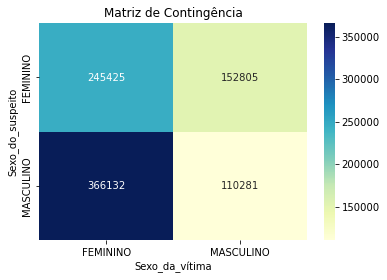

In [119]:
Qui_Quadrado(t, ctab)

In [124]:
df['Frequência'].value_counts()

DIARIAMENTE          726159
OCASIONALMENTE        89547
SEMANALMENTE          88853
NÃO SABE INFORMAR     64571
ÚNICA OCORRÊNCIA      60218
MENSALMENTE           14068
Name: Frequência, dtype: int64

In [125]:
df['Sexo_da_vítima'].value_counts()

FEMININO                                     686173
MASCULINO                                    312906
NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA     29186
NÃO INFORMADO                                 19448
INTERSEXO                                       844
NI                                                4
Name: Sexo_da_vítima, dtype: int64

In [127]:
sample = df[['Frequência','Sexo_da_vítima']]

In [128]:
t = sample[((sample['Frequência'] != 'NÃO SABE INFORMAR')) &
          ((sample['Sexo_da_vítima'] == 'MASCULINO') | (sample['Sexo_da_vítima'] == 'FEMININO'))]

In [134]:
ctab = pd.crosstab(t['Frequência'],t['Sexo_da_vítima'])

<h5>Hipóteses para Teste qui-quadrado para associação</h5>
<p>Para um teste qui-quadrado para associação, as hipóteses são as seguintes:</p>
<p>H0: Não existe nenhuma associação entre variáveis as variáveis Frêquencia e Sexo da Vítima</p>
<p>H1: Existe uma associação entre variáveis as variáveis Frequência e Sexo da Vítima.</p>

Estatística qui-quadrado: 7486.488102383812
Valor p: 0.0
Quantidade de ocorrências após todo o tratamento de dados: 939852
Existe uma associação significativa entre Frequência e Sexo_da_vítima.


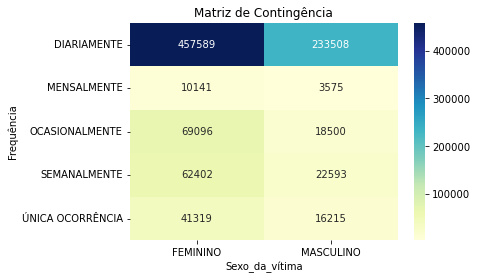

In [135]:
Qui_Quadrado(t,ctab)

In [12]:
sample = df[['UF','Sexo_da_vítima']]
verify(sample,'UF' )
verify(sample,'Sexo_da_vítima' )

Dados Faltantes:  1018

 SP                                265709
RJ                                157707
MG                                112803
RS                                 58314
BA                                 54297
PE                                 38781
PR                                 38390
CE                                 34757
SC                                 34483
GO                                 29988
DF                                 22665
RN                                 20828
AM                                 19722
ES                                 19609
MA                                 17519
MS                                 17178
PA                                 16670
PB                                 15008
PI                                 13969
AL                                 13328
DENUNCIANTE NÃO SOUBE INFORMAR     10268
SE                                 10262
MT                                  8146
TO                              

In [13]:
t = sample.dropna()
t

,UF,Sexo_da_vítima
0,SP,MASCULINO
1,ES,FEMININO
2,PR,MASCULINO
3,SP,FEMININO
4,BA,FEMININO
...,...,...
1048570,SP,FEMININO
1048571,SP,FEMININO
1048572,SP,MASCULINO
1048573,RJ,MASCULINO


In [19]:
t = t[(t['Sexo_da_vítima'] == 'FEMININO') | (t['Sexo_da_vítima'] == 'MASCULINO')]
t = t[(t['UF'] != 'DENUNCIANTE NÃO SOUBE INFORMAR') &  (t['UF'] != 'ATENDIMENTO INTERROMPIDO')]
verify(t,'UF' )
verify(t,'Sexo_da_vítima' )

Dados Faltantes:  0

 SP    251779
RJ    152193
MG    107382
RS     55624
BA     52490
PE     37348
PR     36498
CE     33499
SC     32640
GO     28270
DF     21527
RN     19851
AM     19008
ES     18689
MA     16784
MS     16427
PA     16026
PB     14222
PI     13579
AL     12858
SE      9822
MT      7717
TO      5491
RO      5001
AC      2322
AP      1884
RR      1375
Name: UF, dtype: int64

Descrição dos dados:
 count     990306
unique        27
top           SP
freq      251779
Name: UF, dtype: object
Dados Faltantes:  0

 FEMININO     679506
MASCULINO    310800
Name: Sexo_da_vítima, dtype: int64

Descrição dos dados:
 count       990306
unique           2
top       FEMININO
freq        679506
Name: Sexo_da_vítima, dtype: object


<h5>Hipóteses para Teste qui-quadrado para associação</h5>
<p>Para um teste qui-quadrado para associação, as hipóteses são as seguintes:</p>
<p>H0: Não existe nenhuma associação entre variáveis as variáveis UF e Sexo da Vítima</p>
<p>H1: Existe uma associação entre variáveis as variáveis UF e Sexo da Vítima.</p>

Estatística qui-quadrado: 2546.9253819991013
Valor p: 0.0
Quantidade de ocorrências após todo o tratamento de dados: 990306
Alpha = 0.05
Existe uma associação significativa entre UF e Sexo_da_vítima.


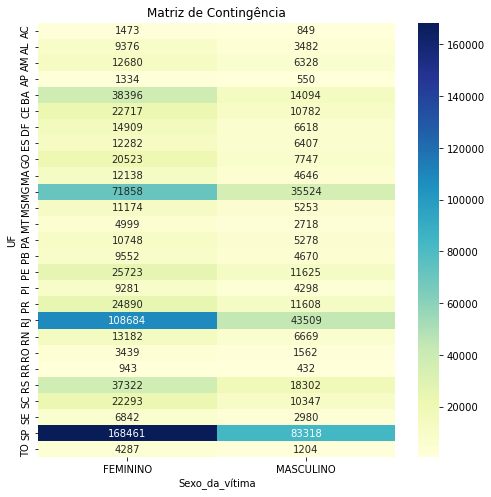

In [26]:
ctab = pd.crosstab(t['UF'],t['Sexo_da_vítima'])
Qui_Quadrado(t,ctab)

In [79]:
t = df[['Relação_vítima_suspeito','Frequência']]
verify(sample, 'Relação_vítima_suspeito')
verify(sample, 'Frequência')

Dados Faltantes:  4

 MÃE                                                                 214721
FILHO(A)                                                            209023
PAI                                                                  74817
OUTROS                                                               57468
COMPANHEIRO(A)                                                       57449
IRMÃO(Ã)                                                             40652
VIZINHO(A)                                                           40077
ESPOSA(O)                                                            38851
EX-COMPANHEIRO(A)                                                    34182
PADRASTO/MADRASTA                                                    26340
DESCONHECIDO(A)                                                      22709
OUTROS FAMILIARES                                                    21593
NETO(A)                                                              16536
PRE

In [80]:
t = t[(t['Frequência'] != 'NÃO SABE INFORMAR')]
t = t[(t['Relação_vítima_suspeito'] != 'NÃO SE APLICA') &  (t['Relação_vítima_suspeito'] != 'NÃO SABE INFORMAR')]
t = t.dropna()

<h5>Hipóteses para Teste qui-quadrado para associação</h5>
<p>Para um teste qui-quadrado para associação, as hipóteses são as seguintes:</p>
<p>H0: Não existe nenhuma associação entre variáveis as variáveis Relação_vítima_suspeito e Frequência</p>
<p>H1: Existe uma associação entre variáveis as variáveis Relação_vítima_suspeito e Frequência.</p>

Estatística qui-quadrado: 160562.5838156615
Valor p: 0.0
Quantidade de ocorrências após todo o tratamento de dados: 965024
Alpha = 0.05
Existe uma associação significativa entre Relação_vítima_suspeito e Frequência.


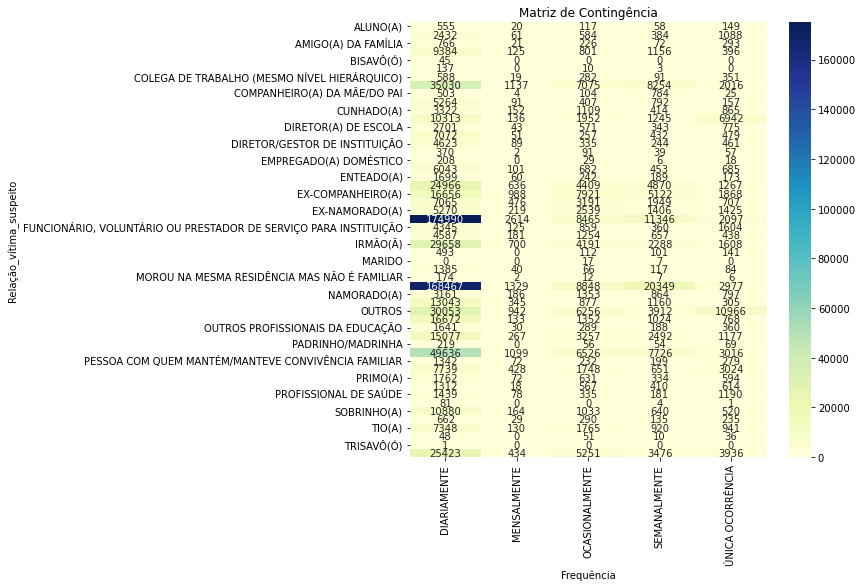

In [81]:
ctab = pd.crosstab(t['Relação_vítima_suspeito'],t['Frequência'])
Qui_Quadrado(t,ctab)

In [87]:
pd.crosstab(t['Relação_vítima_suspeito'],t['Frequência'], margins = True)

Frequência,DIARIAMENTE,MENSALMENTE,OCASIONALMENTE,SEMANALMENTE,ÚNICA OCORRÊNCIA,All
Relação_vítima_suspeito,,,,,,
ALUNO(A),555,20,117,58,149,899
AMIGO(A),2432,61,584,384,1088,4549
AMIGO(A) DA FAMÍLIA,766,21,226,72,293,1378
AVÔ(Ó),9384,125,801,1156,396,11862
BISAVÔ(Ó),45,0,0,0,0,45
BISNETO(A),137,0,10,3,0,150
COLEGA DE TRABALHO (MESMO NÍVEL HIERÁRQUICO),588,19,282,91,351,1331
COMPANHEIRO(A),35030,1137,7075,8254,2016,53512
COMPANHEIRO(A) DA MÃE/DO PAI,503,4,104,784,25,1420


In [73]:
t = df[['Grau_de_instrução_da_vítima', 'Sexo_da_vítima']]
verify(t,'Grau_de_instrução_da_vítima')
verify(t,'Sexo_da_vítima')

Dados Faltantes:  648147

 ENSINO FUNDAMENTAL INCOMPLETO    166291
ENSINO MÉDIO COMPLETO             72150
ANALFABETO/SEM INSTRUÇÃO          55516
ENSINO MÉDIO INCOMPLETO           31150
SUPERIOR COMPLETO                 29989
ENSINO FUNDAMENTAL COMPLETO       20391
SUPERIOR INCOMPLETO               18134
PÓS-GRADUAÇÃO                      5291
MESTRADO                            787
DOUTORADO                           480
PÓS-DOUTORADO                       249
Name: Grau_de_instrução_da_vítima, dtype: int64

Descrição dos dados:
 count                            400428
unique                               11
top       ENSINO FUNDAMENTAL INCOMPLETO
freq                             166291
Name: Grau_de_instrução_da_vítima, dtype: object
Dados Faltantes:  14

 FEMININO                                     686173
MASCULINO                                    312906
NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA     29186
NÃO INFORMADO                                 19448
INTERSEXO             

In [74]:
t = t[(t['Sexo_da_vítima'] != 'NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA') &  (t['Sexo_da_vítima'] != 'NÃO INFORMADO') & (t['Sexo_da_vítima'] != 'NI')]
t = t.dropna()

<h5>Hipóteses para Teste qui-quadrado para associação</h5>
<p>Para um teste qui-quadrado para associação, as hipóteses são as seguintes:</p>
<p>H0: Não existe nenhuma associação entre variáveis as variáveis Grau_de_instrução_da_vítima e Sexo_da_vítima</p>
<p>H1: Existe uma associação entre variáveis as variáveis Grau_de_instrução_da_vítima e Sexo_da_vítima.</p>

Estatística qui-quadrado: 13665.476449056072
Valor p: 0.0
Quantidade de ocorrências após todo o tratamento de dados: 396091
Alpha = 0.05
Existe uma associação significativa entre Grau_de_instrução_da_vítima e Sexo_da_vítima.


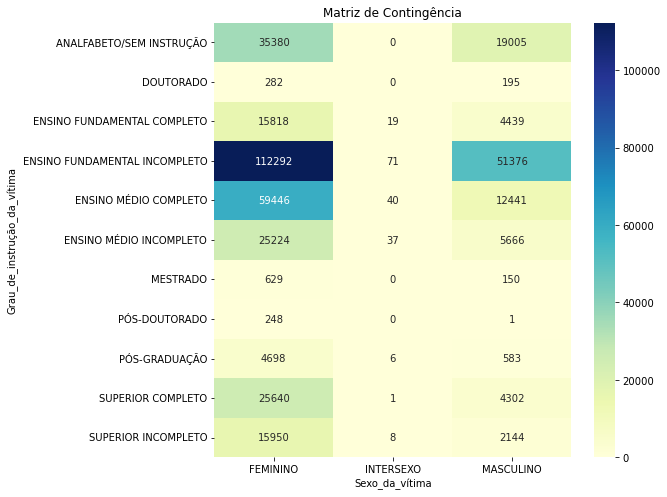

In [76]:
ctab = pd.crosstab(t['Grau_de_instrução_da_vítima'],t['Sexo_da_vítima'])
Qui_Quadrado(t,ctab)

<h1> Teste t de Student para variáveis (qualitativas x quantitativas) </h1>
<p>O Teste t de Student é um teste estatístico usado para comparar as médias de duas amostras independentes.</p>

<p>Teste de Hipóteses</p>

<p>Hipótese Nula (H0): </p>
   <p> Geralmente, a hipótese nula assume que não há diferença entre as médias das duas amostras. Em termos estatísticos, isso significa que μ1 = μ2, onde μ1 é a média da primeira amostra e μ2 é a média da segunda amostra.</p>

<p>Hipótese Alternativa (H1): </p>
   <p> A hipótese alternativa nega a hipótese nula e assume que há uma diferença entre as médias das duas amostras. Dependendo do seu experimento ou pergunta de pesquisa, a hipótese alternativa pode ser unilateral (indicando uma direção específica da diferença) ou bilateral (indicando que há uma diferença, mas não especificando a direção).</p>

<p>Interpretação da Estatística t:</p>

<p>A estatística t é calculada usando as médias das duas amostras, o desvio padrão das amostras e o tamanho das amostras. Quanto maior for a estatística t, maior é a evidência contra a hipótese nula.
Se a estatística t é positiva, indica que a média da primeira amostra é maior do que a média da segunda amostra. Se é negativa, indica que a média da primeira amostra é menor do que a média da segunda amostra.</p>
    
<p>Interprete o Valor-p:</p>

<p>O valor-p é a probabilidade de observar uma estatística t (ou uma mais extrema) se a hipótese nula for verdadeira. Se o valor-p é menor que o nível de significância (geralmente 0,05), você rejeita a hipótese nula em favor da hipótese alternativa.
Se o valor-p é maior do que o nível de significância, não há evidências suficientes para rejeitar a hipótese nula.

<p>Conclusão:</p>

<p>Se o valor-p é menor que o nível de significância escolhido (por exemplo, 0,05), você pode concluir que há evidências estatísticas para afirmar que há uma diferença significativa entre as médias das duas amostras.</p>
<p>Se o valor-p é maior que o nível de significância, você não tem evidências suficientes para concluir que há uma diferença significativa entre as médias das duas amostras.</p>

In [21]:
sample = df[['UF','Sexo_da_vítima','Faixa_etária_da_vítima','Canal_de_atendimento']]

In [22]:
t = sample[(sample['Faixa_etária_da_vítima'] != 'CRIANÇA/ADOLESCENTE IDADE NÃO INFORMADA') & 
           (sample['Faixa_etária_da_vítima'] != 'NÃO INFORMADO') &
          (sample['Faixa_etária_da_vítima'] != 'MENOS DE 01 ANO') &
          (sample['Faixa_etária_da_vítima'] != 'IDOSO IDADE NÃO INFORMADA') &
          (sample['Faixa_etária_da_vítima'] != 'RECÉM-NASCIDO (ATÉ 28 DIAS)') &
          (sample['Faixa_etária_da_vítima'] != 'NASCITURO')]
t.dropna(inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
t['Faixa_etária_da_vítima'] = t['Faixa_etária_da_vítima'].str.replace(' ANOS', '')
t

C:\Users\User\AppData\Local\Temp/ipykernel_17476/3911364474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['Faixa_etária_da_vítima'] = t['Faixa_etária_da_vítima'].str.replace(' ANOS', '')


,UF,Sexo_da_vítima,Faixa_etária_da_vítima,Canal_de_atendimento
0,SP,MASCULINO,80 A 84,TELEFÔNICO
1,ES,FEMININO,55 A 59,TELEFÔNICO
2,PR,MASCULINO,02,TELEFÔNICO
3,SP,FEMININO,85 A 89,WHATSAPP
4,BA,FEMININO,40 A 44,WHATSAPP
...,...,...,...,...
1048570,SP,FEMININO,65 A 69,TELEFÔNICO
1048571,SP,FEMININO,06,TELEFÔNICO
1048572,SP,MASCULINO,10,WHATSAPP
1048573,RJ,MASCULINO,10,TELEFÔNICO


In [29]:
def calcular_media(intervalo):
    numeros = [int(num) for num in re.findall(r'\d+', intervalo)]
    return sum(numeros) / len(numeros)

def substituir_por_media(valor):
    if 'A' in valor: 
        return str(int(calcular_media(valor)))  
    else:
        return valor  



In [30]:
t['Faixa_etária_da_vítima'] = t['Faixa_etária_da_vítima'].apply(substituir_por_media)
t

C:\Users\User\AppData\Local\Temp/ipykernel_17476/2314041805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['Faixa_etária_da_vítima'] = t['Faixa_etária_da_vítima'].apply(substituir_por_media)


,UF,Sexo_da_vítima,Faixa_etária_da_vítima,Canal_de_atendimento
0,SP,MASCULINO,82,TELEFÔNICO
1,ES,FEMININO,57,TELEFÔNICO
2,PR,MASCULINO,02,TELEFÔNICO
3,SP,FEMININO,87,WHATSAPP
4,BA,FEMININO,42,WHATSAPP
...,...,...,...,...
1048570,SP,FEMININO,67,TELEFÔNICO
1048571,SP,FEMININO,06,TELEFÔNICO
1048572,SP,MASCULINO,10,WHATSAPP
1048573,RJ,MASCULINO,10,TELEFÔNICO


In [40]:
t['Faixa_etária_da_vítima'] = t['Faixa_etária_da_vítima'].str.replace('+', '')

C:\Users\User\AppData\Local\Temp/ipykernel_17476/1437433207.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t['Faixa_etária_da_vítima'] = t['Faixa_etária_da_vítima'].str.replace('+', '')
C:\Users\User\AppData\Local\Temp/ipykernel_17476/1437433207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['Faixa_etária_da_vítima'] = t['Faixa_etária_da_vítima'].str.replace('+', '')


In [42]:
t['Faixa_etária_da_vítima'] = t['Faixa_etária_da_vítima'].astype(int)

C:\Users\User\AppData\Local\Temp/ipykernel_17476/2001461711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['Faixa_etária_da_vítima'] = t['Faixa_etária_da_vítima'].astype(int)


In [46]:
l = t[(t['Sexo_da_vítima'] == 'MASCULINO') | (t['Sexo_da_vítima'] == 'FEMININO')]

<h5>Hipóteses para Teste T Student </h5>
<p>para Teste T Student, as hipóteses são as seguintes:</p>
<p>H0: Média de idade da vítima de sexo = Masculino é igual ao sexo = Feminino</p>
<p>H1: Há uma diferença siginificativa entre as médias de idade</p>

Média idade sexo = feminino:  42.518097193928334
Média idade sexo = masculino:  34.54211553852903
Estatística de Teste t: 126.61138094957097
Valor-p: 0.0
Rejeitamos a hipótese nula: As médias são diferentes.


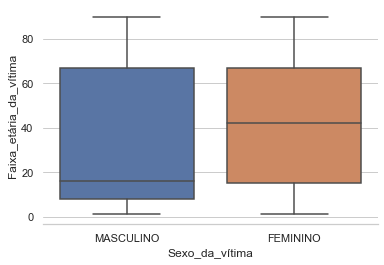

In [66]:
sns.boxplot(x='Sexo_da_vítima', y='Faixa_etária_da_vítima', data=l)
sns.set(style="whitegrid")
sns.despine(left=True)

# teste t de Student para comparar as médias entre os grupos
grupo1 = l[l['Sexo_da_vítima'] == 'FEMININO']['Faixa_etária_da_vítima']
grupo2 = l[l['Sexo_da_vítima'] == 'MASCULINO']['Faixa_etária_da_vítima']

# teste t de Student independente
stat, p_valor = ttest_ind(grupo1, grupo2)

print("Média idade sexo = feminino: ",l[l['Sexo_da_vítima'] == 'FEMININO']['Faixa_etária_da_vítima'].mean())
print("Média idade sexo = masculino: ",l[l['Sexo_da_vítima'] == 'MASCULINO']['Faixa_etária_da_vítima'].mean())
print("Estatística de Teste t:", stat)
print("Valor-p:", p_valor)

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula: As médias são diferentes.")
else:
    print("Não podemos rejeitar a hipótese nula: Não há evidência suficiente para afirmar uma diferença significativa.")

plt.show()

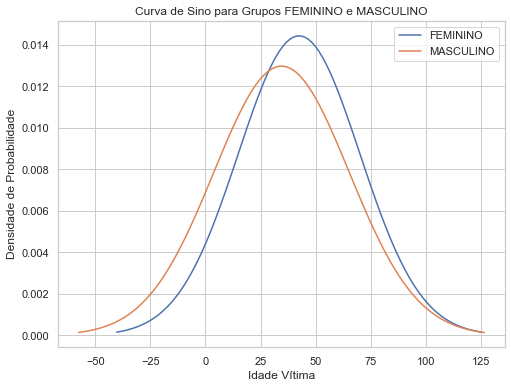

In [58]:
plt.figure(figsize=(8, 6))


mu_A, std_A = np.mean(grupo1), np.std(grupo1)
x_A = np.linspace(mu_A - 3*std_A, mu_A + 3*std_A, 100)
plt.plot(x_A, stats.norm.pdf(x_A, mu_A, std_A), label='FEMININO')


mu_B, std_B = np.mean(grupo2), np.std(grupo2)
x_B = np.linspace(mu_B - 3*std_B, mu_B + 3*std_B, 100)
plt.plot(x_B, stats.norm.pdf(x_B, mu_B, std_B), label='MASCULINO')


plt.title('Curva de Sino para Grupos FEMININO e MASCULINO')
plt.xlabel('Idade Vítima')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
sample = df[['UF','Sexo_do_suspeito','Faixa_etária_do_suspeito','Canal_de_atendimento']]

In [69]:
sample['Faixa_etária_do_suspeito'].value_counts()

40 A 44 ANOS                               118677
30 A 34 ANOS                               116952
35 A 39 ANOS                               114936
NÃO INFORMADO                              104624
25 A 29 ANOS                                93931
45 A 49 ANOS                                77826
50 A 54 ANOS                                75285
20 A 24 ANOS                                58179
55 A 59 ANOS                                42416
60 A 64 ANOS                                38119
65 A 69 ANOS                                17138
70 A 74 ANOS                                12437
18 A 19 ANOS                                11251
75 A 79 ANOS                                 6375
17 ANOS                                      3560
80 A 84 ANOS                                 2876
16 ANOS                                      2741
15 ANOS                                      2304
14 ANOS                                      1727
IDOSO IDADE NÃO INFORMADA                    1414


In [70]:
t = sample[(sample['Faixa_etária_do_suspeito'] != 'CRIANÇA/ADOLESCENTE IDADE NÃO INFORMADA') & 
           (sample['Faixa_etária_do_suspeito'] != 'NÃO INFORMADO') &
          (sample['Faixa_etária_do_suspeito'] != 'IDOSO IDADE NÃO INFORMADA')]
          
t.dropna(inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [74]:
t['Faixa_etária_do_suspeito'] = t['Faixa_etária_do_suspeito'].str.replace(' ANOS', '')
t['Faixa_etária_do_suspeito'] = t['Faixa_etária_do_suspeito'].str.replace('+', '')
t['Faixa_etária_do_suspeito'] = t['Faixa_etária_do_suspeito'].apply(substituir_por_media)
t['Faixa_etária_do_suspeito'] = t['Faixa_etária_do_suspeito'].astype(int)

C:\Users\User\AppData\Local\Temp/ipykernel_17476/2369382506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['Faixa_etária_do_suspeito'] = t['Faixa_etária_do_suspeito'].str.replace(' ANOS', '')
C:\Users\User\AppData\Local\Temp/ipykernel_17476/2369382506.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t['Faixa_etária_do_suspeito'] = t['Faixa_etária_do_suspeito'].str.replace('+', '')
C:\Users\User\AppData\Local\Temp/ipykernel_17476/2369382506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [77]:
l = t[(t['Sexo_do_suspeito'] == 'MASCULINO') | (t['Sexo_do_suspeito'] == 'FEMININO')]

<h5>Hipóteses para Teste T Student </h5>
<p>Para Teste T Student, as hipóteses são as seguintes:</p>
<p>H0: Média de idade do suspeito de sexo = Masculino é igual ao sexo = Feminino</p>
<p>H1: Há uma diferença siginificativa entre as médias de idade</p>

Média idade sexo = feminino:  39.16581828618701
Média idade sexo = masculino:  41.660740910381286
Estatística de Teste t: -81.94436406986725
Valor-p: 0.0
Rejeitamos a hipótese nula: As médias são diferentes.


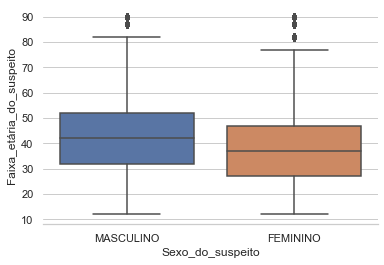

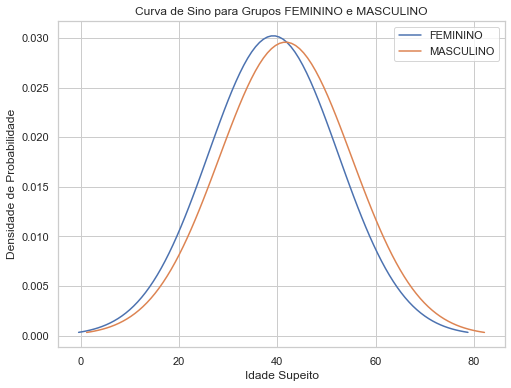

In [81]:
sns.boxplot(x='Sexo_do_suspeito', y='Faixa_etária_do_suspeito', data=l)
sns.set(style="whitegrid")
sns.despine(left=True)

# teste t de Student para comparar as médias entre os grupos
grupo1 = l[l['Sexo_do_suspeito'] == 'FEMININO']['Faixa_etária_do_suspeito']
grupo2 = l[l['Sexo_do_suspeito'] == 'MASCULINO']['Faixa_etária_do_suspeito']

# teste t de Student independente
stat, p_valor = ttest_ind(grupo1, grupo2)

print("Média idade sexo = feminino: ",l[l['Sexo_do_suspeito'] == 'FEMININO']['Faixa_etária_do_suspeito'].mean())
print("Média idade sexo = masculino: ",l[l['Sexo_do_suspeito'] == 'MASCULINO']['Faixa_etária_do_suspeito'].mean())
print("Estatística de Teste t:", stat)
print("Valor-p:", p_valor)

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula: As médias são diferentes.")
else:
    print("Não podemos rejeitar a hipótese nula: Não há evidência suficiente para afirmar uma diferença significativa.")

plt.show()

plt.figure(figsize=(8, 6))


mu_A, std_A = np.mean(grupo1), np.std(grupo1)
x_A = np.linspace(mu_A - 3*std_A, mu_A + 3*std_A, 100)
plt.plot(x_A, stats.norm.pdf(x_A, mu_A, std_A), label='FEMININO')


mu_B, std_B = np.mean(grupo2), np.std(grupo2)
x_B = np.linspace(mu_B - 3*std_B, mu_B + 3*std_B, 100)
plt.plot(x_B, stats.norm.pdf(x_B, mu_B, std_B), label='MASCULINO')


plt.title('Curva de Sino para Grupos FEMININO e MASCULINO')
plt.xlabel('Idade Supeito')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()